C:\Users\Sudha\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


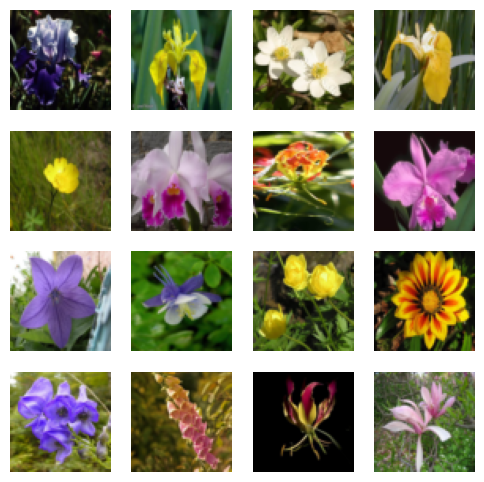

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1] for GANs
])

# Download the Oxford Flowers dataset
dataset = torchvision.datasets.Flowers102(root="./data", split="train", download=True, transform=transform)

# Load dataset
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Show some images
def show_images(data_loader):
    images, _ = next(iter(data_loader))
    images = images[:16]  # Take first 16 images
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0)  # Change shape to (H, W, C)
        img = (img + 1) / 2  # Denormalize
        ax.imshow(img)
        ax.axis("off")
    plt.show()

# Display sample images
show_images(data_loader)


In [2]:
!pip install optuna


   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/383.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/383.6 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/383.6 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 41.0/383.6 kB 330.3 kB/s eta 0:00:02
   ------ -------------------------------- 61.4/383.6 kB 273.8 kB/s eta 0:00:02
   --------- ----------------------------- 92.2/383.6 kB 327.7 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/383.6 kB 344.8 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/383.6 kB 344.8 kB/s eta 0:00:01
   ----------------- -------------------- 174.1/383.6 kB 403.5 kB/s eta 0:00:01
   ----------------- -------------------- 174.1/383.6 kB 403.5 kB/s eta 0:00:01
   -------------------- ----------------- 204.8/383.6 kB 389.1 kB/s eta 0:00:01
   -------------------- ----------------- 204.8/383.6 kB 389.1 kB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

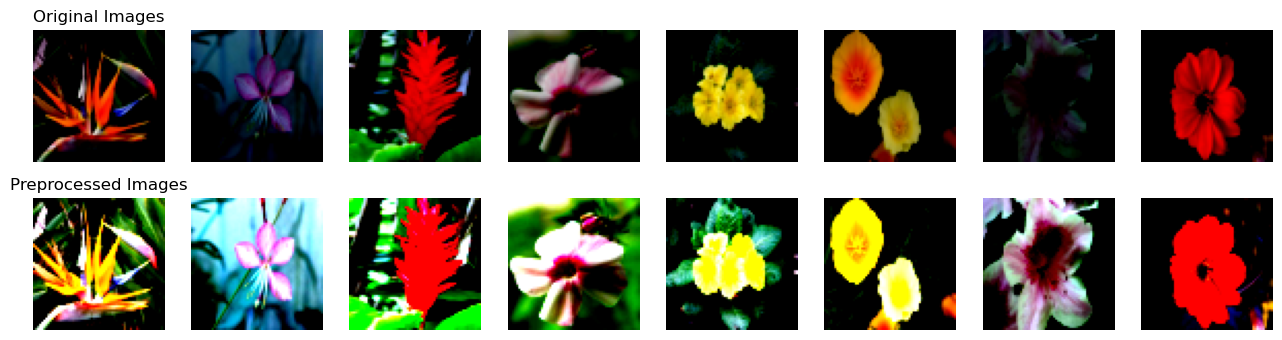

In [22]:
def visualize_original_vs_preprocessed(original, preprocessed, num_images=8):
    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))
    for i in range(num_images):
        orig_img = original[i].cpu().numpy().transpose(1, 2, 0)
        preproc_img = preprocessed[i].cpu().numpy().reshape(3, 64, 64).transpose(1, 2, 0)
        
        axes[0, i].imshow(orig_img)
        axes[0, i].axis("off")
        axes[1, i].imshow(preproc_img)
        axes[1, i].axis("off")
    axes[0, 0].set_title("Original Images")
    axes[1, 0].set_title("Preprocessed Images")
    plt.show()
original_images = next(iter(data_loader))[0][:8]
preprocessed_images = preprocess_images(original_images)
visualize_original_vs_preprocessed(original_images, preprocessed_images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


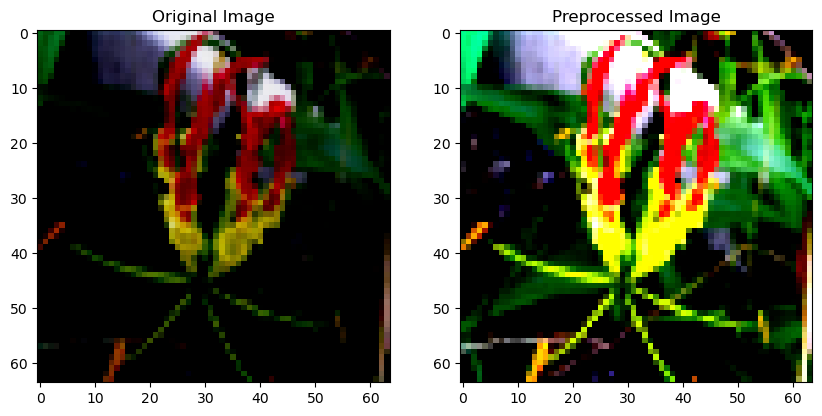

[I 2025-04-04 09:15:26,041] A new study created in memory with name: no-name-b53ded78-9d59-40fc-a29b-326fd529bd24
C:\Users\Sudha\AppData\Local\Temp\ipykernel_27328\113998188.py:98: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.0001, 0.01)
[I 2025-04-04 09:15:55,130] Trial 0 finished with value: 19.969242572784424 and parameters: {'hidden_units': 512, 'learning_rate': 0.0002802323036975411, 'cd_k': 3}. Best is trial 0 with value: 19.969242572784424.
[I 2025-04-04 09:16:14,279] Trial 1 finished with value: 14.589738011360168 and parameters: {'hidden_units': 2048, 'learning_rate': 0.0005086807007325247, 'cd_k': 1}. Best is trial 1 with value: 14.589738011360168.
[I 2025-04-04 09:16:29,671] Trial 2 finished with value: 15.806412816047668 and parameters: {'hidden_units': 51

Best RBM Parameters: {'hidden_units': 2048, 'learning_rate': 0.0014808145197400908, 'cd_k': 1}
Epoch 1/50, Loss: 0.8941
Epoch 2/50, Loss: 0.8583
Epoch 3/50, Loss: 0.8439
Epoch 4/50, Loss: 0.8239
Epoch 5/50, Loss: 0.8056
Epoch 6/50, Loss: 0.7916
Epoch 7/50, Loss: 0.7773
Epoch 8/50, Loss: 0.7636
Epoch 9/50, Loss: 0.7524
Epoch 10/50, Loss: 0.7399
Epoch 11/50, Loss: 0.7300
Epoch 12/50, Loss: 0.7195
Epoch 13/50, Loss: 0.7100
Epoch 14/50, Loss: 0.7005
Epoch 15/50, Loss: 0.6919
Epoch 16/50, Loss: 0.6845
Epoch 17/50, Loss: 0.6781
Epoch 18/50, Loss: 0.6717
Epoch 19/50, Loss: 0.6660
Epoch 20/50, Loss: 0.6601
Epoch 21/50, Loss: 0.6547
Epoch 22/50, Loss: 0.6496
Epoch 23/50, Loss: 0.6450
Epoch 24/50, Loss: 0.6405
Epoch 25/50, Loss: 0.6364
Epoch 26/50, Loss: 0.6322
Epoch 27/50, Loss: 0.6283
Epoch 28/50, Loss: 0.6250
Epoch 29/50, Loss: 0.6214
Epoch 30/50, Loss: 0.6189
Epoch 31/50, Loss: 0.6156
Epoch 32/50, Loss: 0.6124
Epoch 33/50, Loss: 0.6095
Epoch 34/50, Loss: 0.6069
Epoch 35/50, Loss: 0.6043
Epoc

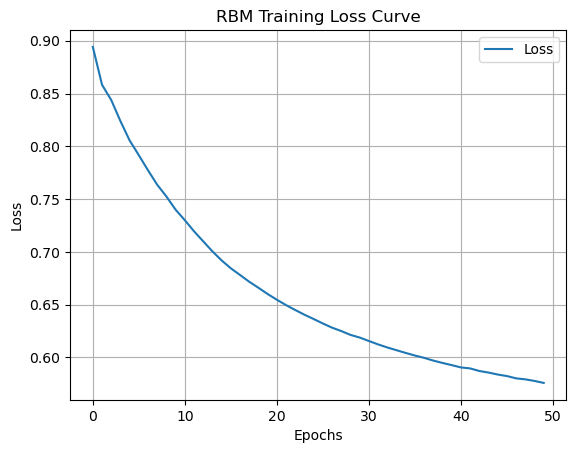

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import optuna

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1] range
])

# Load dataset
dataset = Flowers102(root="./data", split="train", download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

class RBM(nn.Module):
    def __init__(self, visible_units, hidden_units):
        super(RBM, self).__init__()
        self.visible_units = visible_units
        self.hidden_units = hidden_units
        self.W = nn.Parameter(torch.randn(hidden_units, visible_units) * 0.01)
        self.v_bias = nn.Parameter(torch.zeros(visible_units))
        self.h_bias = nn.Parameter(torch.zeros(hidden_units))
        self.loss_history = []  # Track loss values

    def sample_hidden(self, v):
        h_prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        return (torch.rand_like(h_prob) < h_prob).float(), h_prob

    def sample_visible(self, h):
        v_prob = torch.sigmoid(torch.matmul(h, self.W) + self.v_bias)
        return v_prob

    def contrastive_divergence(self, v0, k=1):
        v = v0
        for _ in range(k):
            h, _ = self.sample_hidden(v)
            v = self.sample_visible(h)
        h0, _ = self.sample_hidden(v0)
        hk, _ = self.sample_hidden(v)
        return h0, hk, v

    def train_rbm(self, data_loader, epochs=10, lr=0.001):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.MSELoss()
        
        for epoch in range(epochs):
            epoch_loss = 0
            for images, _ in data_loader:
                images = preprocess_images(images).to(next(self.parameters()).device)
                h0, hk, v_recon = self.contrastive_divergence(images)
                optimizer.zero_grad()
                loss = criterion(v_recon, images)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            avg_loss = epoch_loss / len(data_loader)
            self.loss_history.append(avg_loss)  # Store loss for visualization
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

def preprocess_images(images):
    images = images.view(images.size(0), -1)
    images = (images - images.mean()) / images.std()
    return images

def visualize_images(data_loader):
    images, _ = next(iter(data_loader))
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(images[0].permute(1, 2, 0))
    axes[0].set_title("Original Image")
    preprocessed = preprocess_images(images)[0].view(3, 64, 64).permute(1, 2, 0)
    axes[1].imshow(preprocessed, cmap="gray")
    axes[1].set_title("Preprocessed Image")
    plt.show()

# Function to plot loss curve
def plot_rbm_loss_curve(loss_history):
    plt.plot(loss_history, label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("RBM Training Loss Curve")
    plt.legend()
    plt.grid()
    plt.show()

visualize_images(data_loader)

# Hyperparameter tuning for RBM
def objective(trial):
    hidden_units = trial.suggest_categorical("hidden_units", [512, 1024, 2048])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.0001, 0.01)
    cd_k = trial.suggest_categorical("cd_k", [1, 3, 5])
    
    rbm = RBM(64 * 64 * 3, hidden_units)
    optimizer = optim.Adam(rbm.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    total_loss = 0
    for images, _ in data_loader:
        images = preprocess_images(images).to(next(rbm.parameters()).device)
        h0, hk, v_recon = rbm.contrastive_divergence(images, k=cd_k)
        optimizer.zero_grad()
        loss = criterion(v_recon, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    return total_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
print("Best RBM Parameters:", best_params)

rbm = RBM(64 * 64 * 3, best_params["hidden_units"])
rbm.train_rbm(data_loader, epochs=50, lr=best_params["learning_rate"])

# Plot the loss curve after training
plot_rbm_loss_curve(rbm.loss_history)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


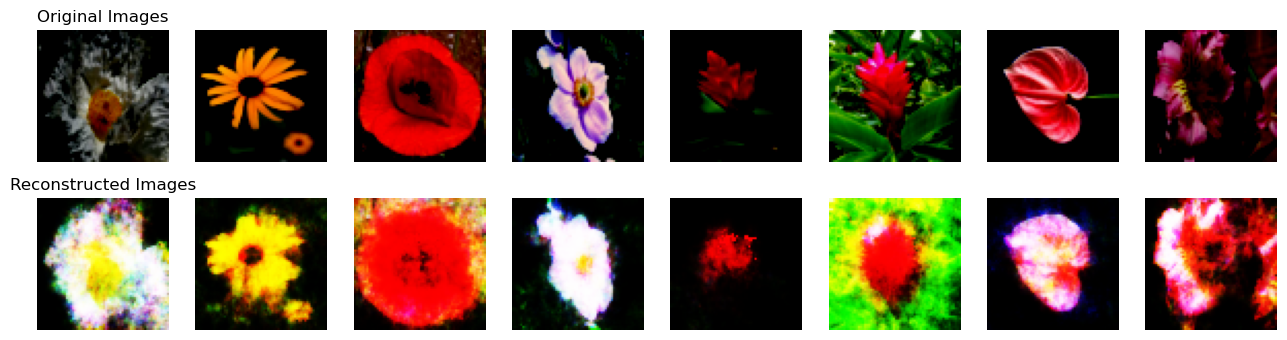

In [24]:
def visualize_reconstructed_images(rbm, data_loader, num_images=8):
    rbm.eval()  # Set RBM to evaluation mode
    device = next(rbm.parameters()).device
    
    images, _ = next(iter(data_loader))
    images = images[:num_images]
    images_flat = preprocess_images(images).to(device)

    with torch.no_grad():
        h, _ = rbm.sample_hidden(images_flat)
        v_recon = rbm.sample_visible(h)

    images = images.cpu()
    v_recon = v_recon.view(-1, 3, 64, 64).cpu()

    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))
    for i in range(num_images):
        axes[0, i].imshow(images[i].permute(1, 2, 0))
        axes[0, i].axis("off")
        axes[1, i].imshow(v_recon[i].permute(1, 2, 0))
        axes[1, i].axis("off")

    axes[0, 0].set_title("Original Images")
    axes[1, 0].set_title("Reconstructed Images")
    plt.show()

# Call the function after training the RBM
visualize_reconstructed_images(rbm, data_loader)


In [26]:
def extract_rbm_features(rbm, data_loader):
    rbm.eval()
    device = next(rbm.parameters()).device
    features = []
    labels = []
    
    with torch.no_grad():
        for images, label in data_loader:
            images_flat = preprocess_images(images).to(device)
            h, _ = rbm.sample_hidden(images_flat)
            features.append(h.cpu())
            labels.append(label)
    
    return torch.cat(features, dim=0), torch.cat(labels, dim=0)

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import optuna
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
import seaborn as sns

In [30]:
class CNNClassifier(nn.Module):
    def __init__(self, hidden_units, num_classes):
        super(CNNClassifier, self).__init__()
        
        # Calculate approximate square dimensions for the features
        self.feature_dim = int(np.sqrt(hidden_units))
        if self.feature_dim * self.feature_dim != hidden_units:
            self.feature_dim += 1  # Round up to ensure we can reshape
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate size after convolutions and pooling
        conv_output_size = 64 * (self.feature_dim // 4) * (self.feature_dim // 4)
        self.fc1 = nn.Linear(conv_output_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # Reshape to (batch_size, 1, feature_dim, feature_dim)
        # Pad with zeros if necessary
        batch_size = x.size(0)
        target_size = self.feature_dim * self.feature_dim
        if x.size(1) < target_size:
            padding = torch.zeros(batch_size, target_size - x.size(1)).to(x.device)
            x = torch.cat([x, padding], dim=1)
        elif x.size(1) > target_size:
            x = x[:, :target_size]
            
        x = x.view(batch_size, 1, self.feature_dim, self.feature_dim)
        
        # CNN operations
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare datasets
def prepare_datasets(rbm, train_loader, test_loader, val_loader=None):
    # Extract features
    X_train, y_train = extract_rbm_features(rbm, train_loader)
    
    if val_loader:
        X_val, y_val = extract_rbm_features(rbm, val_loader)
    else:
        # Split training data if no validation loader provided
        val_size = int(0.2 * len(X_train))
        X_train, X_val = X_train[:-val_size], X_train[-val_size:]
        y_train, y_val = y_train[:-val_size], y_train[-val_size:]
    
    X_test, y_test = extract_rbm_features(rbm, test_loader)
    
    # Create TensorDatasets
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
    
    return train_dataset, val_dataset, test_dataset

In [32]:
# Training function
def train_cnn(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    best_val_acc = 0.0
    best_model_state = None
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict()
        
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print("-" * 50)
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    return model, {
        'train_loss': train_loss_history,
        'val_loss': val_loss_history,
        'train_acc': train_acc_history,
        'val_acc': val_acc_history
    }

In [34]:

# Plot training curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [36]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(102)]))



Epoch 1/30
Train Loss: 4.6823, Train Acc: 0.0123
Val Loss: 4.6327, Val Acc: 0.0049
--------------------------------------------------
Epoch 2/30
Train Loss: 4.6258, Train Acc: 0.0147
Val Loss: 4.6345, Val Acc: 0.0000
--------------------------------------------------
Epoch 3/30
Train Loss: 4.6245, Train Acc: 0.0135
Val Loss: 4.6332, Val Acc: 0.0000
--------------------------------------------------
Epoch 4/30
Train Loss: 4.6240, Train Acc: 0.0098
Val Loss: 4.6429, Val Acc: 0.0098
--------------------------------------------------
Epoch 5/30
Train Loss: 4.6219, Train Acc: 0.0098
Val Loss: 4.6342, Val Acc: 0.0049
--------------------------------------------------
Epoch 6/30
Train Loss: 4.6212, Train Acc: 0.0184
Val Loss: 4.6361, Val Acc: 0.0049
--------------------------------------------------
Epoch 7/30
Train Loss: 4.6218, Train Acc: 0.0123
Val Loss: 4.6353, Val Acc: 0.0000
--------------------------------------------------
Epoch 8/30
Train Loss: 4.6139, Train Acc: 0.0098
Val Loss: 4.6

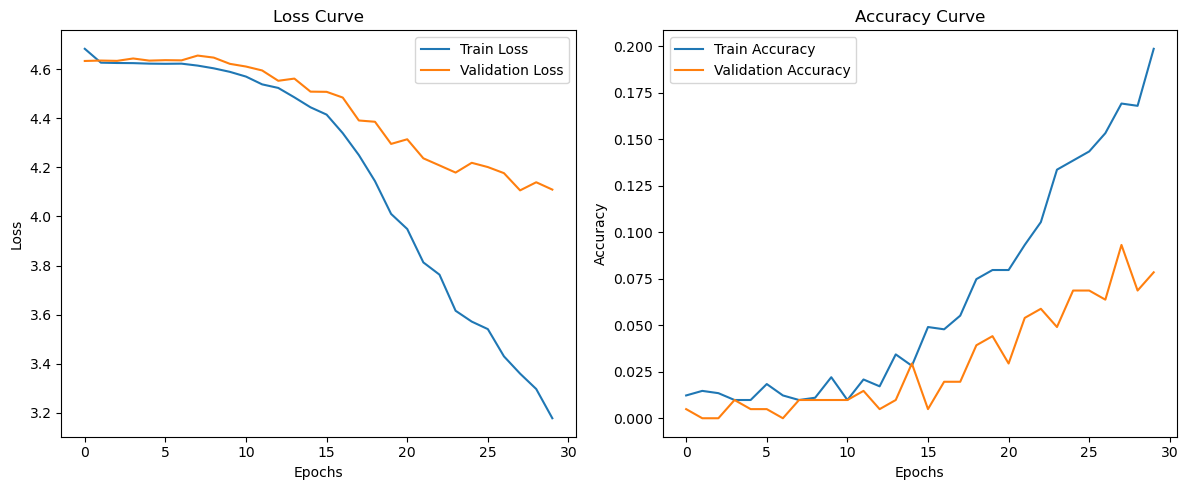

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.05      0.07        20
           1       0.30      0.33      0.31        40
           2       0.02      0.15      0.04        20
           3       0.00      0.00      0.00        36
           4       0.07      0.49      0.12        45
           5       0.05      0.12      0.07        25
           6       0.04      0.10      0.05        20
           7       0.07      0.09      0.08        65
           8       0.00      0.00      0.00        26
           9       0.08      0.36      0.13        25
          10       0.00      0.00      0.00        67
          11       0.06      0.19      0.09        67
          12       0.00      0.00      0.00        29
          13       0.02      0.07      0.04        28
          14       0.02      0.03      0.03        29
          15       0.02      0.10      0.03        21
          16       0.26      0.14      0.18        65
    

C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load test dataset
    test_dataset = Flowers102(root="./data", split="test", download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Prepare datasets with RBM features
    train_dataset, val_dataset, test_dataset = prepare_datasets(rbm, data_loader, test_loader)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Initialize CNN
    # Initialize CNN with RBM feature dimensions
    input_size = rbm.hidden_units  # Use the RBM's hidden_units directly
    cnn = CNNClassifier(rbm.hidden_units, 102).to(device)

# Train CNN
    cnn, history = train_cnn(cnn, train_loader, val_loader, num_epochs=30)
    
    # Plot training curves
    plot_training_curves(history)
    
    # Evaluate model
    evaluate_model(cnn, test_loader)

In [42]:
def evaluatemodel(model, test_loader):
    """Evaluates the model and prints classification metrics."""
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Compute classification metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print("\nMetrics Summary")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return all_labels, all_preds

In [44]:
true_labels, predicted_labels = evaluatemodel(cnn, test_loader)



Metrics Summary
Accuracy: 0.0701
Precision: 0.0754
Recall: 0.0701
F1 Score: 0.0530


# PCA

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader, TensorDataset, random_split
import optuna
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torch.optim.lr_scheduler import CosineAnnealingLR

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [49]:
# Load and split dataset
full_dataset = Flowers102(root="./data", split="train", download=True, transform=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

def preprocess_data(data_loader):
    all_images = []
    for images, _ in data_loader:
        images_flat = images.view(images.size(0), -1).numpy()
        all_images.append(images_flat)
    all_images = np.concatenate(all_images, axis=0)
    
    scaler = StandardScaler()
    images_scaled = scaler.fit_transform(all_images)
    return images_scaled, scaler

images_scaled, scaler = preprocess_data(train_loader)

In [50]:
def objective(trial):
    n_components = trial.suggest_int('n_components', 100, 500, step=50)
    pca = PCA(n_components=n_components)
    pca.fit(images_scaled)
    reconstructed = pca.inverse_transform(pca.transform(images_scaled))
    mse = mean_squared_error(images_scaled, reconstructed)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

best_n_components = study.best_params['n_components']
print(f"Best n_components: {best_n_components}")

# Ensure n_components is a perfect square for reshaping
best_n_components = int(np.floor(np.sqrt(best_n_components))**2)
print(f"Adjusted n_components to perfect square: {best_n_components}")

final_pca = PCA(n_components=best_n_components)
final_pca.fit(images_scaled)


[I 2025-04-04 09:44:50,529] A new study created in memory with name: no-name-57c08e89-7b14-44f3-b9bf-992d10d538d7
[I 2025-04-04 09:44:53,114] Trial 0 finished with value: 0.0520123653113842 and parameters: {'n_components': 350}. Best is trial 0 with value: 0.0520123653113842.
[I 2025-04-04 09:44:54,783] Trial 1 finished with value: 0.08397046476602554 and parameters: {'n_components': 250}. Best is trial 0 with value: 0.0520123653113842.
[I 2025-04-04 09:44:58,014] Trial 2 finished with value: 0.03156401589512825 and parameters: {'n_components': 450}. Best is trial 2 with value: 0.03156401589512825.
[I 2025-04-04 09:44:59,820] Trial 3 finished with value: 0.08391907066106796 and parameters: {'n_components': 250}. Best is trial 2 with value: 0.03156401589512825.
[I 2025-04-04 09:45:02,181] Trial 4 finished with value: 0.05197387933731079 and parameters: {'n_components': 350}. Best is trial 2 with value: 0.03156401589512825.


Best n_components: 450
Adjusted n_components to perfect square: 441


PCA(n_components=441)

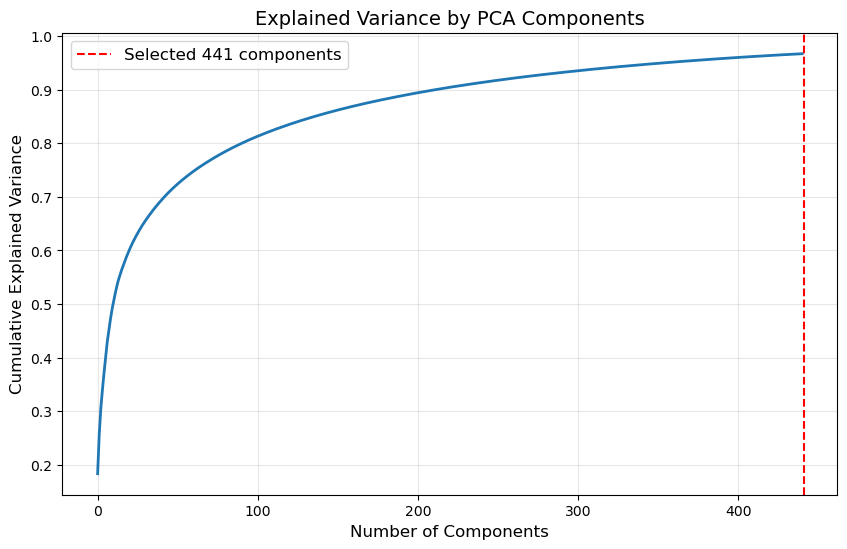

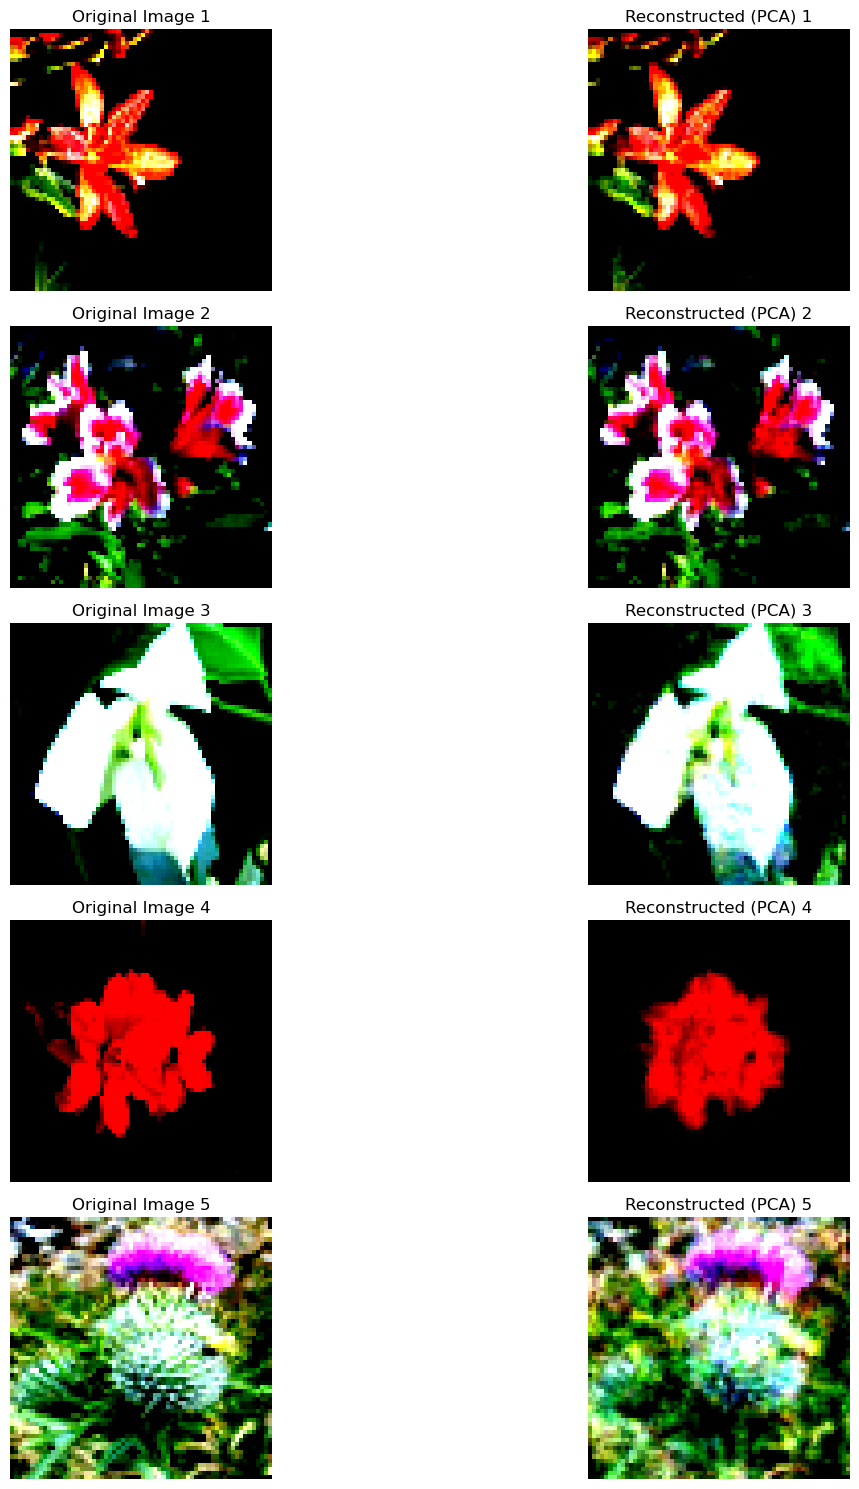

In [53]:
# 1. Explained Variance Visualization
def plot_explained_variance(pca):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
    plt.xlabel('Number of Components', fontsize=12)
    plt.ylabel('Cumulative Explained Variance', fontsize=12)
    plt.title('Explained Variance by PCA Components', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axvline(x=best_n_components, color='r', linestyle='--', 
                label=f'Selected {best_n_components} components')
    plt.legend(fontsize=12)
    plt.show()

# 2. Original vs Reconstructed Images Visualization
def visualize_reconstruction(pca, scaler, original_data, n_samples=5):
    # Select random samples
    sample_indices = np.random.choice(len(original_data), n_samples, replace=False)
    samples = original_data[sample_indices]
    
    # Reconstruct using PCA
    pca_features = pca.transform(samples)
    reconstructed = pca.inverse_transform(pca_features)
    
    # Inverse scaling
    original_images = scaler.inverse_transform(samples)
    reconstructed_images = scaler.inverse_transform(reconstructed)
    
    # Reshape to image format (3, 64, 64) -> (64, 64, 3)
    original_images = original_images.reshape(-1, 3, 64, 64).transpose(0, 2, 3, 1)
    reconstructed_images = reconstructed_images.reshape(-1, 3, 64, 64).transpose(0, 2, 3, 1)
    
    # Normalize pixel values for display
    original_images = np.clip(original_images, 0, 1)
    reconstructed_images = np.clip(reconstructed_images, 0, 1)
    
    # Plot comparison
    plt.figure(figsize=(15, 3*n_samples))
    for i in range(n_samples):
        plt.subplot(n_samples, 2, 2*i+1)
        plt.imshow(original_images[i])
        plt.title(f"Original Image {i+1}")
        plt.axis('off')
        
        plt.subplot(n_samples, 2, 2*i+2)
        plt.imshow(reconstructed_images[i])
        plt.title(f"Reconstructed (PCA) {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call these visualization functions after fitting PCA
plot_explained_variance(final_pca)
visualize_reconstruction(final_pca, scaler, images_scaled, n_samples=5)



In [55]:
# Feature extraction
def extract_pca_features(pca, scaler, data_loader):
    features = []
    labels = []
    for images, labels_batch in data_loader:
        images_flat = images.view(images.size(0), -1).numpy()
        images_scaled = scaler.transform(images_flat)
        pca_features = pca.transform(images_scaled)
        features.append(pca_features)
        labels.append(labels_batch.numpy())
    return np.concatenate(features), np.concatenate(labels)

In [57]:
X_train, y_train = extract_pca_features(final_pca, scaler, train_loader)
X_val, y_val = extract_pca_features(final_pca, scaler, val_loader)

In [58]:
test_dataset = Flowers102(root="./data", split="test", download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
X_test, y_test = extract_pca_features(final_pca, scaler, test_loader)

In [60]:
# Enhanced CNN Model with proper reshaping
class PCACNN(nn.Module):
    def __init__(self, input_dim, num_classes=102):
        super().__init__()
        self.feature_dim = int(np.sqrt(input_dim))
        self.input_dim = input_dim
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.3)
        self.adaptive_pool = nn.AdaptiveAvgPool2d(1)
        
        self.fc = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        # Reshape to square dimensions
        x = x.view(-1, 1, self.feature_dim, self.feature_dim)
        
        x = self.conv1(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        x = self.conv2(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        x = self.conv3(x)
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)
        
        return self.fc(x)


In [61]:
# Data preparation
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
val_dataset = TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val))
test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

In [62]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [67]:
# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PCACNN(input_dim=best_n_components).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

In [69]:
# Training loop
best_val_loss = float('inf')
best_val_acc = 0.0
patience = 10
no_improve = 0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(100):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    scheduler.step()
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_loss / len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # Check for improvement
    if val_loss < best_val_loss or val_acc > best_val_acc:
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | "
          f"LR: {scheduler.get_last_lr()[0]:.6f}")

# Load best model
model.load_state_dict(torch.load('best_model.pth'))

Epoch 1: Train Loss: 4.6404 | Val Loss: 4.6570 | Train Acc: 0.0135 | Val Acc: 0.0098 | LR: 0.000999
Epoch 2: Train Loss: 4.6086 | Val Loss: 4.6791 | Train Acc: 0.0110 | Val Acc: 0.0147 | LR: 0.000996
Epoch 3: Train Loss: 4.5765 | Val Loss: 4.6896 | Train Acc: 0.0147 | Val Acc: 0.0098 | LR: 0.000991
Epoch 4: Train Loss: 4.5416 | Val Loss: 4.6707 | Train Acc: 0.0184 | Val Acc: 0.0049 | LR: 0.000984
Epoch 5: Train Loss: 4.4999 | Val Loss: 4.6803 | Train Acc: 0.0319 | Val Acc: 0.0049 | LR: 0.000976
Epoch 6: Train Loss: 4.4674 | Val Loss: 4.7590 | Train Acc: 0.0306 | Val Acc: 0.0098 | LR: 0.000965
Epoch 7: Train Loss: 4.4485 | Val Loss: 4.7959 | Train Acc: 0.0294 | Val Acc: 0.0098 | LR: 0.000953
Epoch 8: Train Loss: 4.4405 | Val Loss: 4.7310 | Train Acc: 0.0208 | Val Acc: 0.0098 | LR: 0.000939
Epoch 9: Train Loss: 4.4071 | Val Loss: 4.7330 | Train Acc: 0.0319 | Val Acc: 0.0049 | LR: 0.000923
Epoch 10: Train Loss: 4.4050 | Val Loss: 4.7805 | Train Acc: 0.0331 | Val Acc: 0.0098 | LR: 0.000905

<All keys matched successfully>

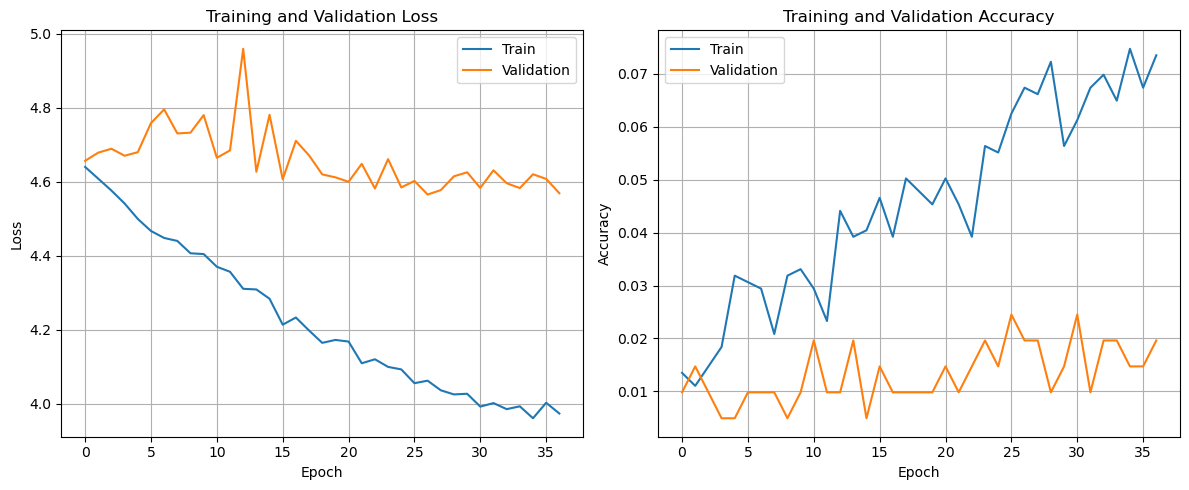

In [70]:
# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


In [71]:
# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        25
           6       0.02      0.35      0.05        20
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        67
          11       0.04      0.19      0.06        67
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        65
   

C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

# 1. Calculate Basic Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print("\n=== Basic Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")



=== Basic Metrics ===
Accuracy: 0.0433
Precision (weighted): 0.0467
Recall (weighted): 0.0433
F1-Score (weighted): 0.0194


C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
# 5. ROC AUC (for binary classification would use roc_auc_score)
# For multiclass, you could calculate for each class vs rest
try:
    from sklearn.metrics import roc_auc_score
    if len(np.unique(all_labels)) == 2:  # Binary case
        roc_auc = roc_auc_score(all_labels, all_probs[:, 1])
        print(f"\nROC AUC Score: {roc_auc:.4f}")
    else:  # Multiclass case
        roc_auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')
        print(f"\nROC AUC Score (One-vs-Rest): {roc_auc:.4f}")
except ImportError:
    pass


ROC AUC Score (One-vs-Rest): 0.6887


# PCA vs RBM COMPARISON

In [80]:
# Store the first method's results (evaluatemodel)
rbm_metrics = {
    "Accuracy": accuracy_score(true_labels, predicted_labels),
    "Precision": precision_score(true_labels, predicted_labels, average="weighted", zero_division=0),
    "Recall": recall_score(true_labels, predicted_labels, average="weighted", zero_division=0),
    "F1 Score": f1_score(true_labels, predicted_labels, average="weighted"),
}

# Store the second method's results
pca_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}


In [82]:
print("\n=== Model Comparison ===")
print(f"{'Metric':<12} {'RBM+CNN':<10} {'PCA+CNN':<10}")
for metric in rbm_metrics.keys():
    print(f"{metric:<12} {rbm_metrics[metric]:<10.4f} {pca_metrics[metric]:<10.4f}")



=== Model Comparison ===
Metric       RBM+CNN    PCA+CNN   
Accuracy     0.0701     0.0433    
Precision    0.0754     0.0467    
Recall       0.0701     0.0433    
F1 Score     0.0530     0.0194    


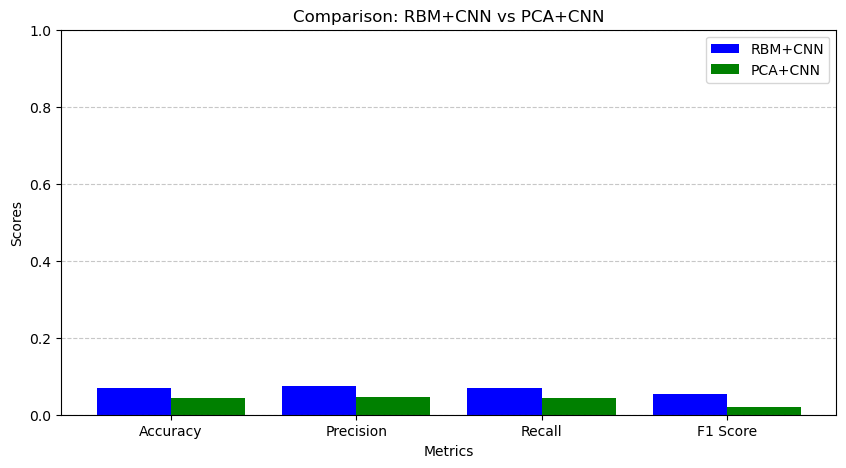

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and their values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
rbm_values = list(rbm_metrics.values())
pca_values = list(pca_metrics.values())

# Set up bar positions
x = np.arange(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, rbm_values, width=0.4, label="RBM+CNN", color='blue')
plt.bar(x + 0.2, pca_values, width=0.4, label="PCA+CNN", color='green')

# Labels and Titles
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Comparison: RBM+CNN vs PCA+CNN")
plt.xticks(x, metrics)
plt.ylim(0, 1)  # Adjust range if needed
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [90]:
# Save RBM + CNN model
torch.save(cnn.state_dict(), "rbm_cnn_model1.pkl")
print("Saved RBM + CNN model as 'rbm_cnn_model.pkl'")


Saved RBM + CNN model as 'rbm_cnn_model.pkl'


In [92]:
# Save PCA + CNN model
torch.save(model.state_dict(), "pca_cnn_model.pkl")
print("Saved PCA + CNN model as 'pca_cnn_model.pkl'")


Saved PCA + CNN model as 'pca_cnn_model.pkl'


In [100]:
# Load class labels
dataset = torchvision.datasets.Flowers102(root="./data", split="train", download=True)

# Get all unique class labels (Flower102 dataset has 102 classes labeled 0-101)
class_labels = list(range(102))  # Labels are from 0 to 101

print("Number of classes:", len(class_labels))
print("Class Labels (0-based index):", class_labels)


Number of classes: 102
Class Labels (0-based index): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


In [105]:
!pip install tensorflow-datasets


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB 1.4 MB/s eta 0:00:04
    --------------------------------------- 0.1/5.3 MB 1.3 MB/s eta 0:00:05
   - -------------------------------------- 0.2/5.3 MB 1.1 MB/s eta 0:00:05
   - -------------------------------------- 0.2/5.3 MB 1.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.3/5.3 MB 1.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.3/5.3 MB 1.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/5.3 MB 1.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.4/5.3 MB 1.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.5/5.3 MB 1.2 MB/s eta 0:00:05
   ---- ----------------------------------- 0.6/5.3 MB 1.2 MB/s eta 0:00:04
   ---- ----------------------------------- 0.6/5.3 MB 1.2 MB/s eta 0

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

In [111]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations (already used by you)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [113]:
# Load train+val and test datasets
train_dataset = Flowers102(root="./data", split="train", download=True, transform=transform)
val_dataset = Flowers102(root="./data", split="val", download=True, transform=transform)
test_dataset = Flowers102(root="./data", split="test", download=True, transform=transform)


In [115]:
# Combine train and val for training
full_train_dataset = torch.utils.data.ConcatDataset([train_dataset, val_dataset])
train_loader = DataLoader(full_train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [117]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=102):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [119]:
# Initialize model
model = SimpleCNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [121]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch 1/10, Loss: 4.5830, Accuracy: 1.57%
Epoch 2/10, Loss: 4.2607, Accuracy: 4.07%
Epoch 3/10, Loss: 3.8439, Accuracy: 9.17%
Epoch 4/10, Loss: 3.4793, Accuracy: 13.19%
Epoch 5/10, Loss: 3.2498, Accuracy: 18.68%
Epoch 6/10, Loss: 2.9901, Accuracy: 24.31%
Epoch 7/10, Loss: 2.7795, Accuracy: 27.16%
Epoch 8/10, Loss: 2.5317, Accuracy: 32.89%
Epoch 9/10, Loss: 2.3182, Accuracy: 37.16%
Epoch 10/10, Loss: 2.0633, Accuracy: 42.70%


In [125]:
# Test accuracy
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_accuracy = 100 * correct / total
print(f"\nFinal Test Accuracy on Original Dataset: {final_accuracy:.2f}%")


Final Test Accuracy on Original Dataset: 24.43%


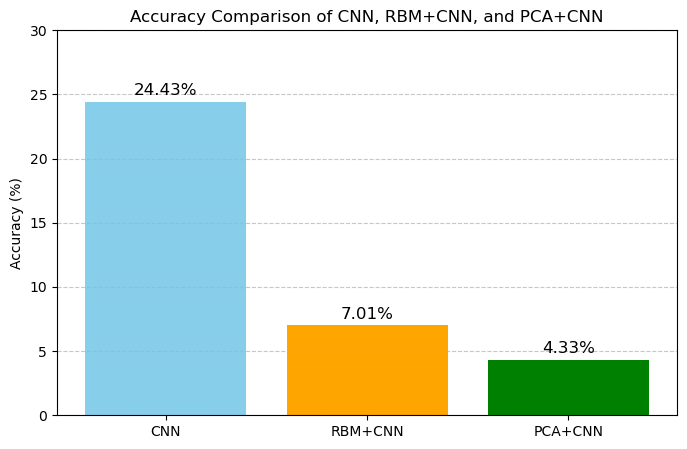

In [127]:
import matplotlib.pyplot as plt

# Updated Accuracy Values
cnn_acc = 24.43
rbm_cnn_acc = 7.01
pca_cnn_acc = 4.33

methods = ['CNN', 'RBM+CNN', 'PCA+CNN']
accuracies = [cnn_acc, rbm_cnn_acc, pca_cnn_acc]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, accuracies, color=['skyblue', 'orange', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of CNN, RBM+CNN, and PCA+CNN')
plt.ylim(0, 30)  # updated for better scale

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


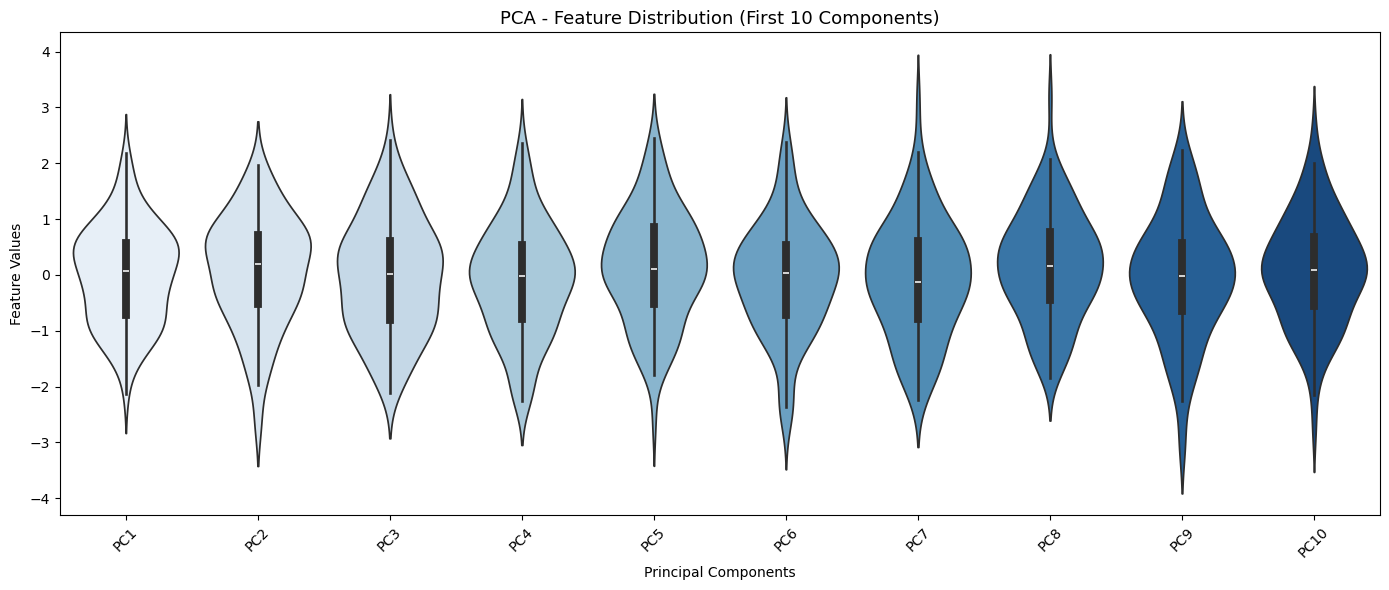

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===== Replace these with your actual feature arrays =====
# Example data (replace with actual PCA/RBM outputs)
pca_features = np.random.normal(0, 1, (100, 10))   # 100 samples, 10 components
rbm_features = np.random.normal(0, 1.5, (100, 10))
# =========================================================

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
rbm_df = pd.DataFrame(rbm_features, columns=[f'RBM{i+1}' for i in range(rbm_features.shape[1])])

# Plot
plt.figure(figsize=(14, 6))


sns.violinplot(data=pca_df, palette='Blues')
plt.title("PCA - Feature Distribution (First 10 Components)", fontsize=13)
plt.xlabel("Principal Components")
plt.ylabel("Feature Values")
plt.xticks(rotation=45)

# RBM Violin Plot


plt.tight_layout()
plt.show()


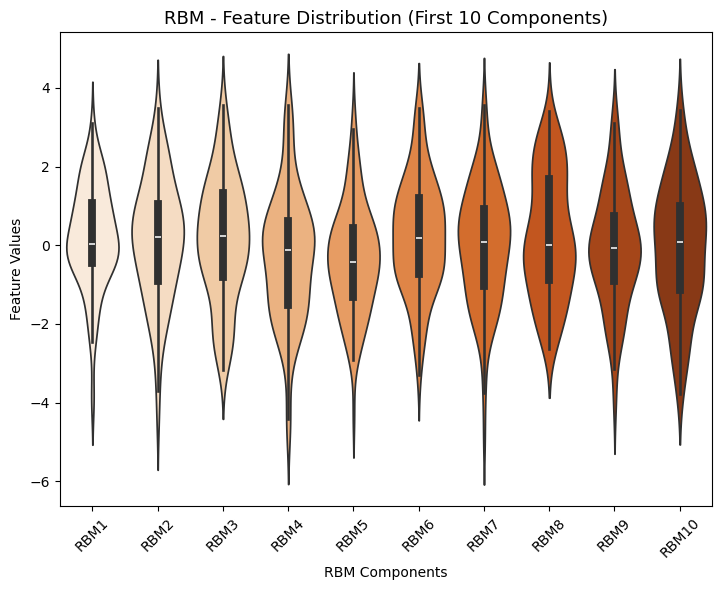

In [139]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.violinplot(data=rbm_df, palette='Oranges')
plt.title("RBM - Feature Distribution (First 10 Components)", fontsize=13)
plt.xlabel("RBM Components")
plt.ylabel("Feature Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()